### Project 1

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Load the csv file and show top 5 records from it.

In [2]:
df = pd.read_csv("CSV/players_20.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


#### 2.How you would be able to see each column's name.

In [3]:
print(list(df.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

#### 3.Need to show number of rows and columns of this dataset.

In [4]:
rows = len(df.axes[0])
print(rows)

18278


In [5]:
cols = len(df.axes[1])
print(cols)

104


In [6]:
## Or you can use this method

df.shape

(18278, 104)

#### 4.Show number of players and their countries.

In [7]:
print(df['short_name'].count())

18278


In [8]:
print(len(pd.unique(df['nationality'])))

162


#### 5.If you find many records in point 4 then show only top 10 countries and their number of players.

In [10]:
df['nationality'].value_counts()[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

#### 6.Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.

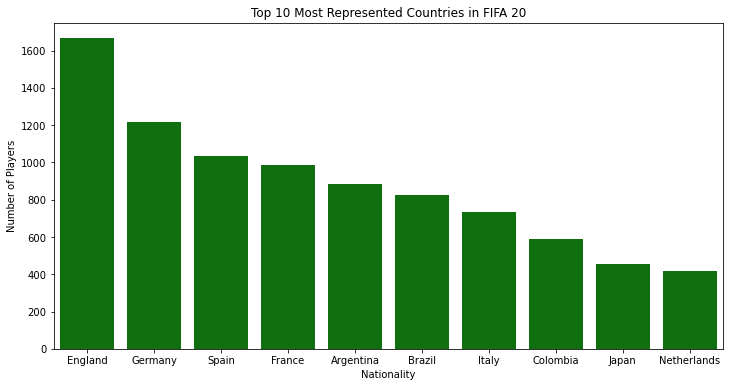

In [17]:
# Sets figure size
plt.figure(figsize=(12, 6))

# Uses the index of the dataframe to define the x-axis for the top 10 countries and sets the y-axis 
# to the number of players per country and changes the color to green 
sns.barplot(x = df['nationality'].value_counts()[:10].index,
            y = df['nationality'].value_counts()[:10], color="green")

# Sets the labels for the x-axis, y-axis, and the title

plt.xlabel("Nationality")
plt.ylabel("Number of Players")
plt.title("Top 10 Most Represented Countries in FIFA 20")
plt.show()

#### 7.Show top 5 players short name and wages.

In [56]:
df[['short_name', 'player_positions', 'wage_eur']].head()


,short_name,player_positions,wage_eur
0,L. Messi,"RW, CF, ST",565000
1,Cristiano Ronaldo,"ST, LW",405000
2,Neymar Jr,"LW, CAM",290000
3,J. Oblak,GK,125000
4,E. Hazard,"LW, CF",470000


#### 8.Show top 5 players short name and wages that are getting highest salaries.

In [54]:
player_wages = df[['short_name', 'player_positions', 'wage_eur',]].sort_values(by='wage_eur', ascending=False) \
               .reset_index(drop=True)
player_wages[:5]

,short_name,player_positions,wage_eur
0,L. Messi,"RW, CF, ST",565000
1,E. Hazard,"LW, CF",470000
2,Cristiano Ronaldo,"ST, LW",405000
3,K. De Bruyne,"CAM, CM",370000
4,A. Griezmann,"CF, ST, LW",370000


#### 9.Create a bar plot of point number 8.

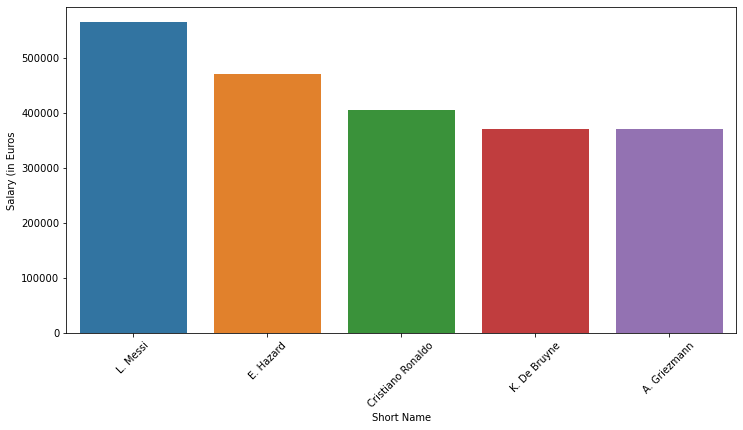

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'short_name',
            y = 'wage_eur',
            data = player_wages[:5])
plt.xlabel("Short Name")
plt.ylabel("Salary (in Euros")
plt.xticks(rotation=45)
plt.show()

#### 10.Show top 10 records of Germany.

In [33]:
## Create dataframe of just German players

germany_df = df[df['nationality'] == 'Germany']
germany_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3


#### 11. Now show top 5 records of Germany players who have maximum height, weight and wages.

##### Top 5 Tallest Players

In [57]:
germany_df[['short_name', 'player_positions', 'height_cm']].sort_values(by="height_cm", ascending=False).head()

,short_name,player_positions,height_cm
8016,A. Seydel,"ST, LM",199
1217,M. Esser,GK,198
1389,L. Unnerstall,GK,198
11859,D. Stroh-Engel,ST,197
13576,L. Watkowiak,GK,197


##### Top 5 Heaviest Players

In [58]:
germany_df[['short_name', 'player_positions', 'weight_kg']].sort_values(by="weight_kg", ascending=False).head()

,short_name,player_positions,weight_kg
13576,L. Watkowiak,GK,103
1389,L. Unnerstall,GK,103
518,R. Fährmann,GK,98
1217,M. Esser,GK,97
77,N. Süle,CB,97


##### Top 5 Highest Paid Players

In [59]:
germany_df[['short_name', 'player_positions', 'wage_eur']].sort_values(by="wage_eur", ascending=False).head()

,short_name,player_positions,wage_eur
36,T. Kroos,CM,330000
6,M. ter Stegen,GK,250000
55,L. Sané,LW,195000
146,I. Gündoğan,"CM, CDM",180000
70,T. Müller,"CAM, RM, RW",170000


#### 13.Show top 5 players who have great shooting skills among all with short name.

In [60]:
df[['short_name', 'player_positions', 'nationality', 'club', 'shooting']] \
    .sort_values(by='shooting', ascending=False).head()

,short_name,player_positions,nationality,club,shooting
1,Cristiano Ronaldo,"ST, LW",Portugal,Juventus,93.0
0,L. Messi,"RW, CF, ST",Argentina,FC Barcelona,92.0
12,H. Kane,ST,England,Tottenham Hotspur,91.0
17,S. Agüero,ST,Argentina,Manchester City,90.0
205,F. Quagliarella,ST,Italy,Sampdoria,89.0


##### 14.Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

In [61]:
df[['short_name', 'player_positions', 'nationality', 'club', 'defending']] \
    .sort_values(by='defending', ascending=False).head()

,short_name,player_positions,nationality,club,defending
16,G. Chiellini,CB,Italy,Juventus,90.0
7,V. van Dijk,CB,Netherlands,Liverpool,90.0
11,K. Koulibaly,CB,Senegal,Napoli,89.0
35,D. Godín,CB,Uruguay,Inter,89.0
49,M. Hummels,CB,Germany,Borussia Dortmund,89.0


#### 15. Show wages records of top 5 players of 'Real Madrid' team.

In [49]:
# Create a dataframe of just Real Madrid players
rm_df = df[df['club'] == "Real Madrid"]

In [62]:
rm_df[['short_name', 'player_positions', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head()

,short_name,player_positions,wage_eur
4,E. Hazard,"LW, CF",470000
8,L. Modrić,CM,340000
36,T. Kroos,CM,330000
18,Sergio Ramos,CB,300000
46,K. Benzema,"CF, ST",285000


#### 16. Show shooting records of top 5 players of 'Real Madrid' team.

In [63]:
rm_df[['short_name', 'player_positions', 'shooting']].sort_values(by='shooting', ascending=False).head()

,short_name,player_positions,shooting
100,G. Bale,"RW, LW, ST",87.0
106,J. Rodríguez,"CAM, CM, RM",86.0
4,E. Hazard,"LW, CF",83.0
46,K. Benzema,"CF, ST",82.0
161,L. Jović,ST,82.0


#### 17. Show defending records of top 5 players of 'Real Madrid' team.

In [64]:
rm_df[['short_name', 'player_positions', 'defending']].sort_values(by='defending', ascending=False).head()

,short_name,player_positions,defending
18,Sergio Ramos,CB,87.0
42,Casemiro,CDM,85.0
76,R. Varane,CB,85.0
94,Carvajal,RB,82.0
332,Éder Militão,"CB, RB",81.0


#### 18. Show nationality records of top 5 players of 'Real Madrid' team.

In [65]:
rm_df['nationality'].value_counts()

Spain                 13
Brazil                 6
France                 3
Belgium                2
Costa Rica             1
Colombia               1
Germany                1
Uruguay                1
Wales                  1
Japan                  1
Croatia                1
Dominican Republic     1
Serbia                 1
Name: nationality, dtype: int64